In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn2pmml import sklearn2pmml, PMMLPipeline

In [ ]:
data = pd.read_csv('two_category.csv')
data = pd.get_dummies(data, columns=['classic_bluetooth'], prefix='classic_bluetooth')
X = np.stack(data[['packet_len', 'ad_cnt', 'classic_bluetooth_unknown', 'classic_bluetooth_yes', 'classic_bluetooth_no']].values)

# One-Hot Encoding for device types
encoder = OneHotEncoder(sparse=False)
device_type_onehot = encoder.fit_transform(data[['label']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, device_type_onehot, test_size=0.2, random_state=41)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a Multi-layer Perceptron classifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Define hyperparameters for grid search
parameter_space = {
    'hidden_layer_sizes': [(10, 5),(10,),(20,), (50,) ,(10,10), (10,20), (10,50),(10,10,10), (10,20,10), (10,40,10), (20,20,20), (20,50,20),(50,50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init': [0.1, 0.01, 0.001, 0.0001]
}

# Grid search with cross-validation
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Print out the best parameters
print('Best parameters found:\n', clf.best_params_)

# Predict using the model with the best parameters
y_pred = clf.predict(X_test)

# Test the model
score = clf.score(X_test, y_test)
print("Test score: ", score)

In [ ]:
# One-Hot Encoding for device types
encoder = OneHotEncoder(sparse=False)
device_type_onehot = encoder.fit_transform(data[['label']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, device_type_onehot, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a Multi-layer Perceptron classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 40, 10), max_iter=2000, alpha=0.0001,
                    solver='sgd', verbose=10, random_state=42,
                    learning_rate_init=0.1, activation = 'relu')


# Train the model
mlp.fit(X_train, y_train)

# Test the model
score = mlp.score(X_test, y_test)
print("Test score: ", score)

In [ ]:
y_test_pred = mlp.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))

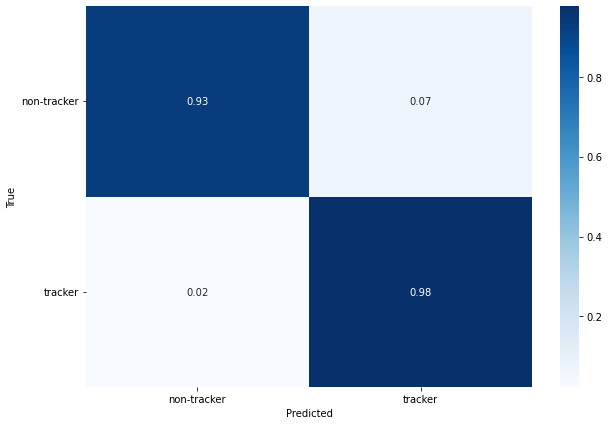

In [29]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,7))
class_names = ['non-tracker', 'tracker']
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.yticks(rotation=0) 
plt.show()

In [ ]:
unseen_data = pd.read_csv('two_category_unseen.csv')
X_unseen = np.stack(unseen_data[['packet_len', 'ad_cnt', 'bluetooth_unknown',  'bluetooth_yes', 'bluetooth_no']].values)
device_type_onehot = encoder.transform(unseen_data[['label']])
X_unseen = scaler.transform(X_unseen)
y_unseen = device_type_onehot
# Unseen devices test
score = mlp.score(X_unseen, y_unseen)
y_pred = mlp.predict(X_unseen)
print(score)
print(classification_report(y_unseen, y_pred))
cm = confusion_matrix(y_unseen.argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,7))
class_names = ['non-tracker', 'tracker']
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.yticks(rotation=0) 
plt.show()

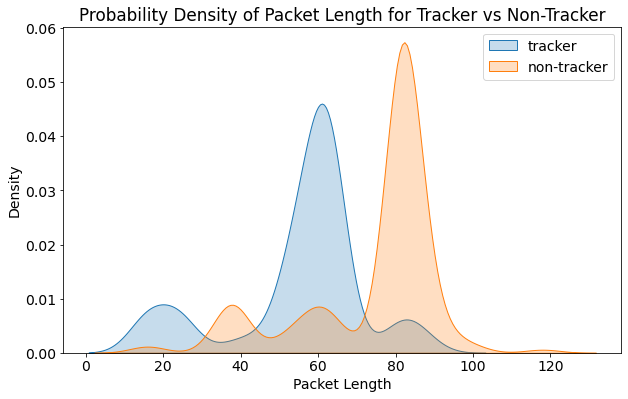

In [167]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['label'] == 'tracker'], x='packet_len', label='tracker', fill=True)
sns.kdeplot(data=data[data['label'] == 'non_tracker'], x='packet_len', label='non-tracker', fill=True)

plt.title('Probability Density of Packet Length for Tracker vs Non-Tracker')
plt.xlabel('Packet Length')
plt.ylabel('Density')
plt.legend()
plt.show()

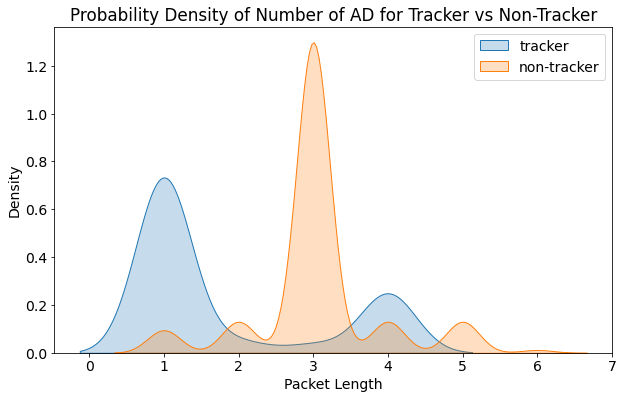

In [168]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['label'] == 'tracker'], x='ad_cnt', label='tracker', fill=True)
sns.kdeplot(data=data[data['label'] == 'non_tracker'], x='ad_cnt', label='non-tracker', fill=True)

plt.title('Probability Density of Number of AD for Tracker vs Non-Tracker')
plt.xlabel('Packet Length')
plt.ylabel('Density')
plt.legend()
plt.show()

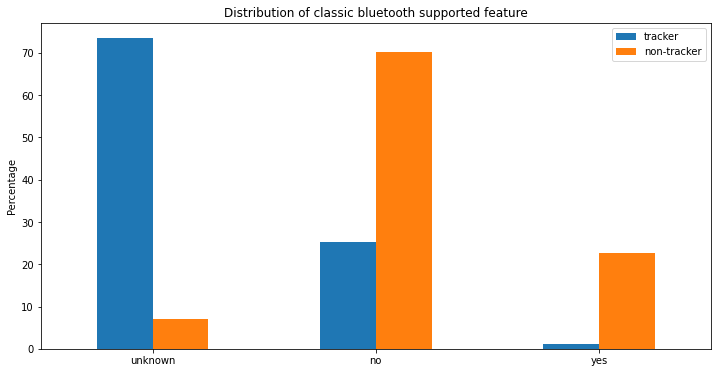

In [25]:
data = pd.read_csv('two_category.csv')

tracker_counts = data[data['label'] == 'tracker']['classic_bluetooth'].value_counts(normalize=True) * 100
non_tracker_counts = data[data['label'] == 'non_tracker']['classic_bluetooth'].value_counts(normalize=True) * 100

combined_data = pd.concat([tracker_counts, non_tracker_counts], axis=1)
combined_data.columns = ['tracker', 'non-tracker']

ax = combined_data.plot(kind='bar', figsize=(12, 6))
ax.set_ylabel('Percentage')
ax.set_title('Distribution of classic bluetooth supported feature')
plt.xticks(rotation=0)  # 设置x轴标签的角度
plt.show()

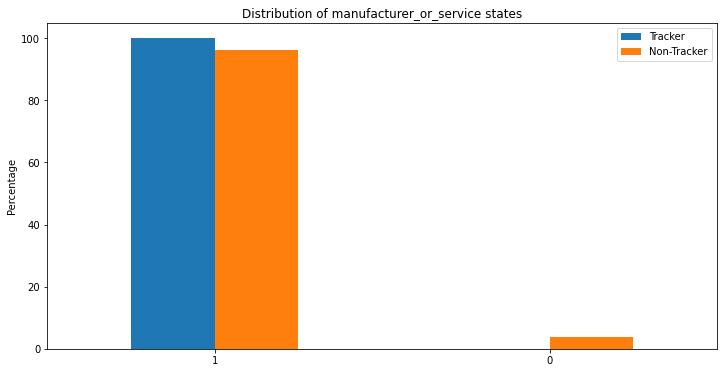

In [26]:
data = pd.read_csv('two_category.csv')


tracker_counts = data[data['label'] == 'tracker']['manufacturer_or_service'].value_counts(normalize=True) * 100
non_tracker_counts = data[data['label'] == 'non_tracker']['manufacturer_or_service'].value_counts(normalize=True) * 100


combined_data = pd.concat([tracker_counts, non_tracker_counts], axis=1)
combined_data.columns = ['Tracker', 'Non-Tracker']


ax = combined_data.plot(kind='bar', figsize=(12, 6))
ax.set_ylabel('Percentage')
ax.set_title('Distribution of manufacturer_or_service states')
plt.xticks(rotation=0)  # 设置x轴标签的角度
plt.show()

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model

# L2 regularization
regularizer = l2(1e-4)

data = pd.read_csv('two_category.csv')
data = pd.get_dummies(data, columns=['classic_bluetooth'], prefix='classic_bluetooth')
X = np.stack(data[['packet_len', 'ad_cnt', 'classic_bluetooth_unknown', 'classic_bluetooth_yes', 'classic_bluetooth_no']].values)

# Split data first
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# Label Encoding for device types
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_raw)
y_test_encoded = encoder.transform(y_test_raw)

# Convert labels to categorical
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_regularizer=regularizer))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_regularizer=regularizer))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train_categorical, epochs=2000, verbose=1)

# Predict using the model (though not used later in your code)
y_predict = model.predict(X_test)

# Test the model
score = model.evaluate(X_test, y_test_categorical, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
    f.write(tflite_model)

Epoch 1/2000
30/30 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.7216
Epoch 2/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.8078
Epoch 3/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8456
Epoch 4/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8487
Epoch 5/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8466
Epoch 6/2000
30/30 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8603
Epoch 7/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8750
Epoch 8/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8739
Epoch 9/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8750
Epoch 10/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8687

30/30 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.9055
Epoch 163/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.9097
Epoch 164/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.8981
Epoch 165/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.9107
Epoch 166/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9139
Epoch 167/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.9023
Epoch 168/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.9097
Epoch 169/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.9128
Epoch 170/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.9086
Epoch 171/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.9002
Epoch 243/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9055
Epoch 244/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.9013
Epoch 245/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.9181
Epoch 246/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.9118
Epoch 247/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.9044
Epoch 248/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.9013
Epoch 249/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.9097
Epoch 250/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9139
Epoch 251/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.9097
Epoch 403/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.9076
Epoch 404/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.9086
Epoch 405/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.9086
Epoch 406/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.9160
Epoch 407/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.9170
Epoch 408/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.9128
Epoch 409/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.9055
Epoch 410/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9149
Epoch 411/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.9086
Epoch 483/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.9149
Epoch 484/2000
30/30 [==============================] - ETA: 0s - loss: 0.2578 - accuracy: 0.90 - 0s 2ms/step - loss: 0.2546 - accuracy: 0.9107
Epoch 485/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.9160
Epoch 486/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.9170
Epoch 487/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.9128
Epoch 488/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9170
Epoch 489/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9139
Epoch 490/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9160
Epoch 491/2000
30/30 [==============================] -

30/30 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.9160
Epoch 642/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9076
Epoch 643/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9170
Epoch 644/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.9086
Epoch 645/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9055
Epoch 646/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.9149
Epoch 647/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.9065
Epoch 648/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9160
Epoch 649/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9107
Epoch 650/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9086
Epoch 722/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9086
Epoch 723/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.9202
Epoch 724/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.9202
Epoch 725/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.9065
Epoch 726/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.9118
Epoch 727/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9107
Epoch 728/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.9212
Epoch 729/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9118
Epoch 730/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.9191
Epoch 882/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9118
Epoch 883/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9097
Epoch 884/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9149
Epoch 885/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9128
Epoch 886/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9223
Epoch 887/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9202
Epoch 888/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9202
Epoch 889/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9055
Epoch 890/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9202
Epoch 1042/2000
30/30 [==============================] - 0s 3ms/step - loss: 0.2461 - accuracy: 0.9139
Epoch 1043/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9160
Epoch 1044/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9149
Epoch 1045/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.9149
Epoch 1046/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9065
Epoch 1047/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9170
Epoch 1048/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9118
Epoch 1049/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.9139
Epoch 1050/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2276 - acc

30/30 [==============================] - ETA: 0s - loss: 0.2320 - accuracy: 0.91 - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9128
Epoch 1200/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9107
Epoch 1201/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9097
Epoch 1202/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9139
Epoch 1203/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.9149
Epoch 1204/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9139
Epoch 1205/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9233
Epoch 1206/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9181
Epoch 1207/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9160
Epoch 1208/2000
30/30 [========================

30/30 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9160
Epoch 1358/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9160
Epoch 1359/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9191
Epoch 1360/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9191
Epoch 1361/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.9233
Epoch 1362/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9128
Epoch 1363/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9160
Epoch 1364/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9086
Epoch 1365/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9191
Epoch 1366/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2439 - acc

30/30 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9128
Epoch 1516/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9086
Epoch 1517/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9170
Epoch 1518/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9160
Epoch 1519/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9233
Epoch 1520/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9160
Epoch 1521/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9170
Epoch 1522/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9118
Epoch 1523/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9191
Epoch 1524/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2331 - acc

30/30 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9160
Epoch 1674/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9170
Epoch 1675/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.9170
Epoch 1676/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9170
Epoch 1677/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.9034
Epoch 1678/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9223
Epoch 1679/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9107
Epoch 1680/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9170
Epoch 1681/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9149
Epoch 1682/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2359 - acc

30/30 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.9118
Epoch 1832/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9170
Epoch 1833/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9202
Epoch 1834/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9181
Epoch 1835/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2281 - accuracy: 0.9160
Epoch 1836/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9202
Epoch 1837/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9118
Epoch 1838/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9128
Epoch 1839/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9191
Epoch 1840/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2336 - acc

30/30 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9118
Epoch 1989/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9202
Epoch 1990/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9160
Epoch 1991/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9086
Epoch 1992/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9065
Epoch 1993/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9212
Epoch 1994/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9128
Epoch 1995/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9160
Epoch 1996/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.9118
Epoch 1997/2000
30/30 [==============================] - 0s 2ms/step - loss: 0.2158 - acc

In [8]:
print(scaler.mean_)
print(scaler.scale_)

[67.15546218  2.63235294  0.30042017  0.1460084   0.55357143]
[20.13277856  1.15651404  0.45844072  0.35311464  0.49712182]


In [1]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)

NameError: name 'tf' is not defined